<a href="https://colab.research.google.com/github/dirudiez/TFM_DiegoRudiez/blob/main/ClasificadorBinario_sinProcesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai -Uq

#Reiniciamos el entorno de ejecución automáticamente
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

     |████████████████████████████████| 197 kB 36.5 MB/s 
     |████████████████████████████████| 60 kB 6.7 MB/s 


{'restart': True, 'status': 'ok'}

In [1]:
from fastai.vision.all import *

In [2]:
!wget https://www.dropbox.com/s/1isaa8xrrv0x6n4/datasetComprimido.zip?dl=0 --no-verbose -O datasetComp.zip

2022-06-16 07:14:03 URL:https://ucd64cd2674a49223ec1504f33f0.dl.dropboxusercontent.com/cd/0/inline2/BnRc0jFol-fvUFaXMrzZzy4_pLNDi5Xw4pH9vTwPIckf5m43tSufuvwZRL18cAiRPl2UgOlgXW3hZh-SWDnLMarP6_nGCRogqVSeV8bpqyebccSMUtiNHIlxpjFyWXFqqNFNPsFAxVTiFffmbgE74nmn0TQX9hH3DdlrCNckxxJXfyaK-ZKYeOu2aqSZo-tZLpAb8miwnQb_HzWGmKWpFoM_0eLEmKAGNzmLWJdsovjz2ylnmKZlnnyrjGWSFhrX_2lFekzXX-wOdNF7w-o6ybVpCnApjLtkS5NjgMW0zrSe3vUPlZAPO7aSob14DxMpomTcUwLBsY4YB3QcLjMecKvyq14hKhSo2nG4FaWILYjLTQw1Dk1zOe3GJp9SnIItDyd3WTqrvZ0hbFvTdAEPVc95Z4NqnvxkRC5Q3_JVftSWzg/file [144922725/144922725] -> "datasetComp.zip" [1]


In [3]:
!unzip -qq datasetComp.zip

In [4]:
trainPath = Path('Training_Set_C/')
testPath  = Path('Test_Set_C/')
valPath  =  Path('Evaluation_Set_C/')

In [5]:
df_train = pd.read_csv(str(trainPath) + '/train.csv')
df_test = pd.read_csv(str(testPath) + '/test.csv')
df_val = pd.read_csv(str(valPath) + '/val.csv')

In [6]:
#Método para crear estructura de directorios
def crearEstructura(nombreDataset, clases):
  !mkdir "$nombreDataset"
  !mkdir "$nombreDataset"/test
  !mkdir "$nombreDataset"/train
  !mkdir "$nombreDataset"/val
  for x in clases:
    !mkdir "$nombreDataset"/train/"$x"
    !mkdir "$nombreDataset"/test/"$x"
    !mkdir "$nombreDataset"/val/"$x"

In [7]:
crearEstructura('dataset', ['normal', 'enfermedad'])

In [8]:
import shutil

def moverImg(df, pathO, pathD):
  for id, enf in zip(df['ID'], df['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(pathO + '/' + str(id) + '.png', pathD + '/normal')
    else:
        shutil.move(pathO + str(id) + '.png', pathD + '/enfermedad')

In [9]:
path = Path('dataset')

In [10]:
moverImg(df_train, str(trainPath) + '/Training/', str(path)  + '/train')
moverImg(df_test, str(testPath) + '/Test/', str(path)  + '/test')
moverImg(df_val, str(valPath) + '/Validation/', str(path)  + '/val')

## Cargando el dataset

In [11]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(train_name='train', valid_name='val'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))

In [12]:
dls = db.dataloaders(path,bs=128)

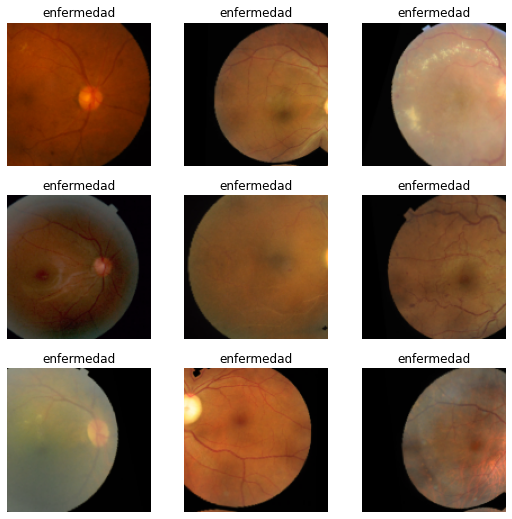

In [13]:
dls.show_batch()

In [14]:
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=20),
    SaveModelCallback()  
]

In [15]:
learn = cnn_learner(dls,resnet18,metrics=accuracy,cbs=callbacks).to_fp16()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(minimum=0.010000000149011612, steep=7.585775847473997e-07, valley=0.0006918309954926372, slide=0.0063095735386013985)

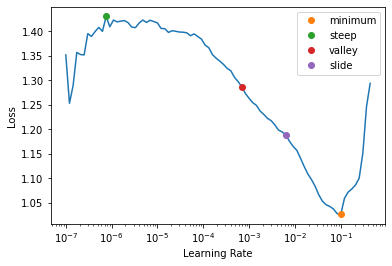

In [16]:
learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

## Entrenamos el modelo

epoch,train_loss,valid_loss,accuracy,time
0,1.170749,0.619761,0.735937,00:09


Better model found at epoch 0 with valid_loss value: 0.6197614669799805.


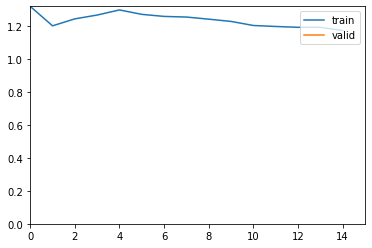

epoch,train_loss,valid_loss,accuracy,time
0,1.059820,0.607149,0.725000,00:10
1,1.022854,0.612506,0.728125,00:08
2,0.994407,0.612733,0.721875,00:08
3,0.967463,0.601851,0.739062,00:08
4,0.965140,0.591338,0.748438,00:08
5,0.929497,0.592762,0.743750,00:08
6,0.902266,0.590274,0.745313,00:08
7,0.891161,0.594684,0.750000,00:08
8,0.865913,0.587503,0.770312,00:08
9,0.846268,0.576094,0.781250,00:08


Better model found at epoch 0 with valid_loss value: 0.6071485280990601.


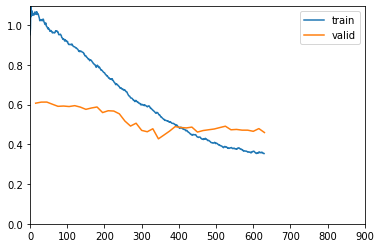

Better model found at epoch 3 with valid_loss value: 0.6018514633178711.
Better model found at epoch 4 with valid_loss value: 0.591338038444519.
Better model found at epoch 6 with valid_loss value: 0.5902739763259888.
Better model found at epoch 8 with valid_loss value: 0.5875028371810913.
Better model found at epoch 9 with valid_loss value: 0.5760935544967651.
Better model found at epoch 12 with valid_loss value: 0.5598762631416321.
Better model found at epoch 15 with valid_loss value: 0.5535044074058533.
Better model found at epoch 16 with valid_loss value: 0.5170766115188599.
Better model found at epoch 17 with valid_loss value: 0.4919373393058777.
Better model found at epoch 19 with valid_loss value: 0.47017917037010193.
Better model found at epoch 20 with valid_loss value: 0.4633675515651703.
Better model found at epoch 22 with valid_loss value: 0.4276498854160309.
No improvement since epoch 22: early stopping


In [17]:
learn.fine_tune(60,base_lr=3e-4)

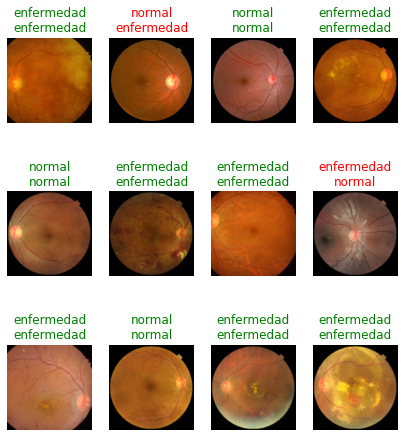

In [18]:
learn.show_results(max_n=12, figsize=(7,8))

## Evaluando el Modelo

In [19]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=128)

In [20]:
learn.dls = dlsTest

Hemos obtenido una accuracy de 0.75.

In [21]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.754687488079071.


(#2) [0.5414043068885803,0.754687488079071]

In [22]:
#Exportamos el modelo:

learn.to_fp32()
learn.export('modeloBinario_sinProcesar.pkl')